<a href="https://colab.research.google.com/github/kamyarmhn/Pandas-Preparing-Dataset/blob/main/Pandas_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Assignment

In this notebook, you'll have a tour on the basics of Pandas library, the de facto standard tool of data analysis.

Let's get started!

## 1 - Packages
Let's first import all the packages that you will need during this assignment.

- ```numpy```, the fundamental package for scientific computing with Python
- ```pandas```, the main tool to deal with tabular datasets
- ```matplotlib```, ```seaborn``` and ```plotly```, libraries to plot graphs in Python
- ```missingno```, missing data visualization module for Python
- ```pycountry_convert```, a module of conversion functions between ISO country names, country-codes, and continent names
- ```warnings```, whichi supplies several exception classes that represent warnings

In [56]:
!pip install -q pycountry_convert

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import chardet

import plotly.express as px

from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3, country_alpha3_to_country_alpha2

warnings.filterwarnings('ignore')
%matplotlib notebook
%matplotlib inline

## 2 - Dataset

You'll use [**Book-Crossing Dataset**](http://www2.informatik.uni-freiburg.de/~cziegler/BX/), a dataset collected in a 4-week crawl from the Book-Crossing community and usually used for recommendation algorithms.

First, download and extract the dataset using the following commands:

In [58]:
!wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2023-07-19 16:39:58--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip.1’

BX-CSV-Dump.zip.1   100%[===================>]  24.88M  14.0MB/s    in 1.8s    

2023-07-19 16:40:00 (14.0 MB/s) - ‘BX-CSV-Dump.zip.1’ saved [26085508/26085508]



In [59]:
!unzip "/content/BX-CSV-Dump.zip"

Archive:  /content/BX-CSV-Dump.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


## 3 - Data Preprocessing

Next, you should read the ```BX-Users.csv``` file of the dataset with Pandas methods and investigate its dimensions:

In [60]:
# GRADED CELL

users_data_dir = "/content/BX-Users.csv"

### START CODE HERE ### (≈ 1 line of code)

users = pd.read_csv(users_data_dir, sep=';', warn_bad_lines=False, encoding="latin1")

### END CODE HERE ###

In [61]:
print('The shape of Users is: ' + str(users.shape))

The shape of Users is: (278858, 3)


In [62]:
assert users.shape == (278858, 3)

Now we can have a glance at our dataset:

In [63]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


As you see, the raw dataset structure is not well-organized and needs to be processed.

We'll start with column names. Rename the columns from `User-ID`, `Location` and `Age` to `userId`, `location` and `age`.

In [64]:
# GRADED CELL

### START CODE HERE ### (≈ 1 line of code)
users.columns = ['userId', 'location', 'age']

### END CODE HERE ###

In [65]:
assert list(users.columns) == ['userId', 'location', 'age']

Then, it's a good idea to check whether the dataset has some missing values or not. We use ```missingno``` to have a visualization for missing values:

<Axes: >

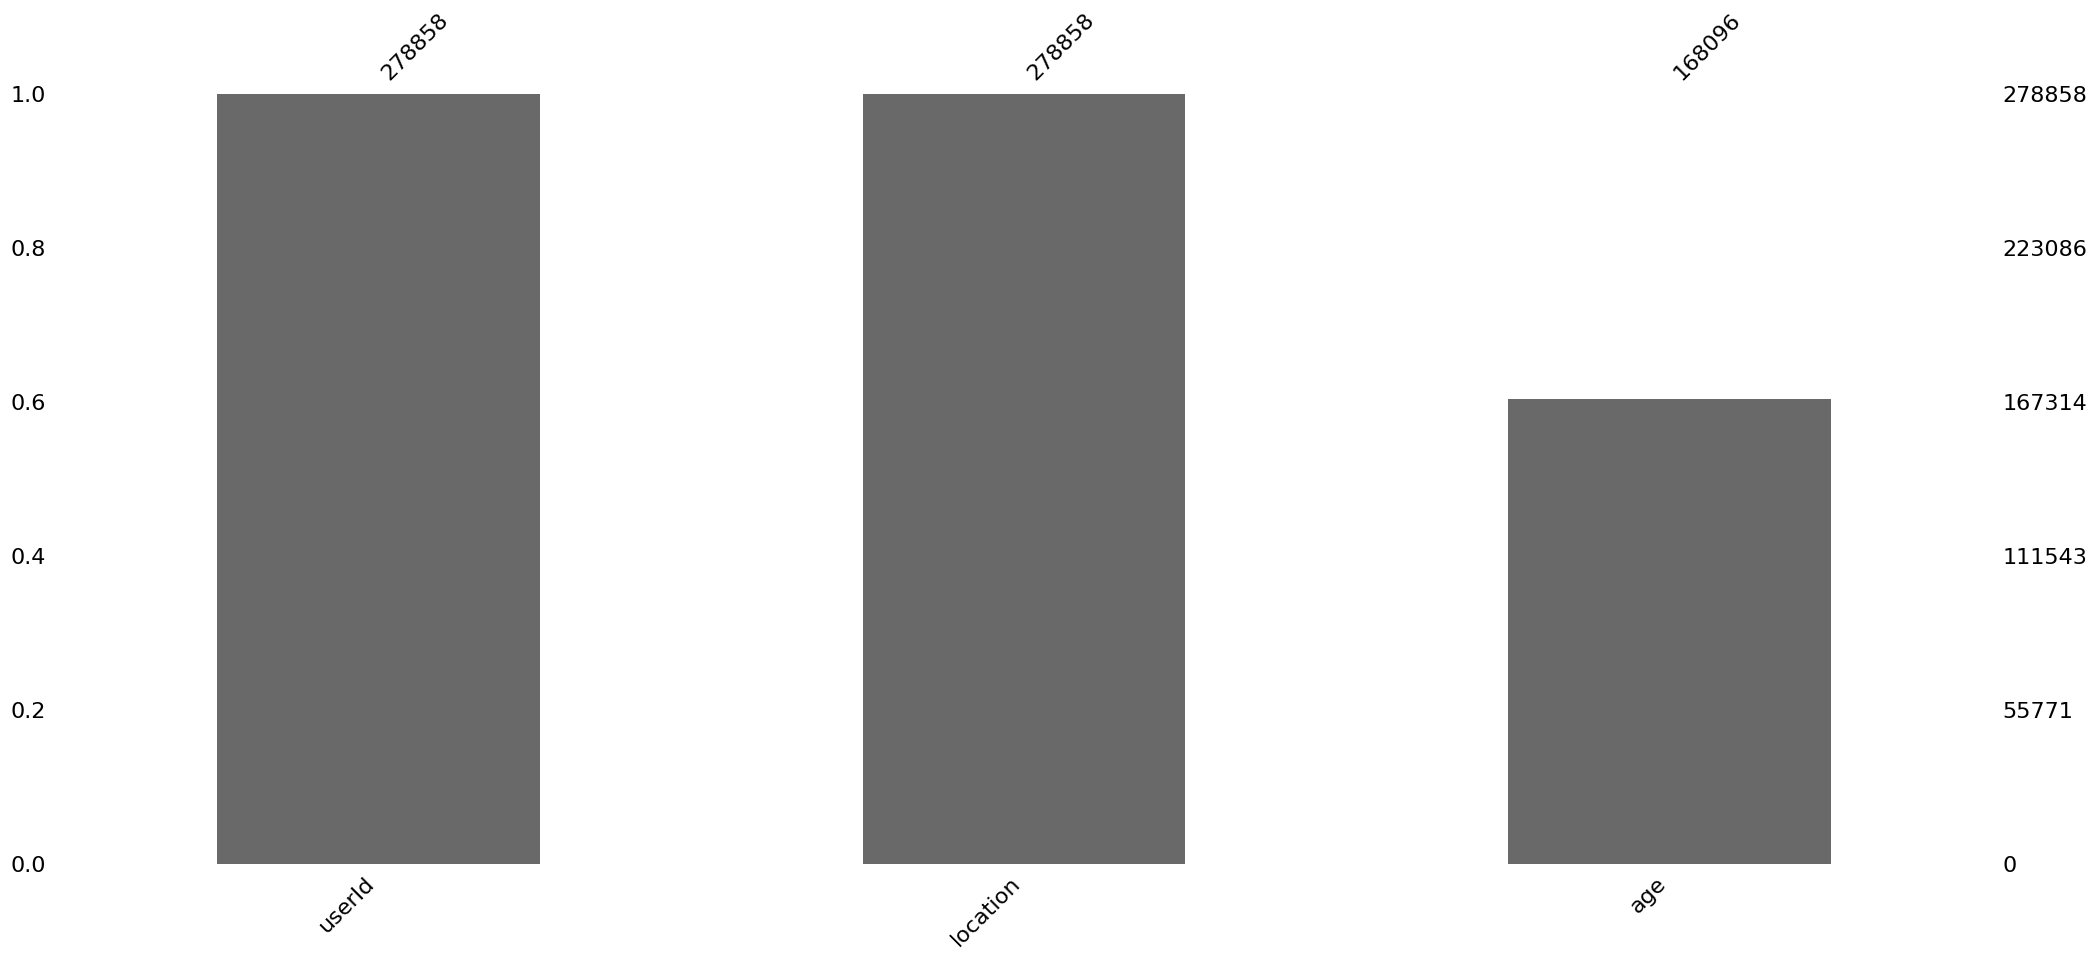

In [66]:
msno.bar(users)

As shown below, We have many missing values in ```age``` column; So it's time to preprocess it:

- Convert `age` data type to `float`.
- Set the values of ages fewer than 5 to `np.nan`.
- Set the values of ages greater than 110 to `np.nan`.

In [67]:
# GRADED CELL

### START CODE HERE ### (≈ 3-5 lines of code)
users.age = users.age.astype(float)
print("Users with age < 5: ", users.loc[users.age<5,'age'].count())
print("Users with age > 110: ", users.loc[users.age > 110,'age'].count())
users.loc[users.age < 5,'age'] = np.nan
users.loc[users.age > 110,'age'] = np.nan

### END CODE HERE ###

Users with age < 5:  882
Users with age > 110:  96


In [68]:
assert len(users.loc[users.age < 5,'age']) == 0
assert len(users.loc[users.age > 110,'age']) == 0

For imputing the missing values of `age` column, we use a normal distribution which its center is the mean of ages, its scale is the standard deviation of ages and its size will equal to the count of missing values in `age` column.



In [69]:
temp_age_series = pd.Series(np.random.normal(
    loc=users.age.mean(),
    scale=users.age.std(),
    size=users.userId[users.age.isna()].count()
  ))
print("Statistics of values in \'users.age\'\n",users.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")

Statistics of values in 'users.age'
 count    167118.000000
mean         34.858244
std          13.901748
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    111740.000000
mean         34.939079
std          13.918025
min         -26.504516
25%          25.603532
50%          34.913384
75%          44.379100
max          94.484816
dtype: float64 

Negative values in 'temp_age_seires': 684 



As we can see the distribution does not change a lot. There are some negative values thought. However, we can ignore them and use an absolute version of the distribution for imputation.



```
# This is formatted as code
```



1.   Take the absolute values of `temp_age_series`.

In [70]:
# GRADED CELL

### START CODE HERE ### (≈ 1 line of code)
pos_age_series = np.abs(temp_age_series)

### END CODE HERE ###

2.   Sort users dataframe so as NaN values in age to be first and reset index to match with index of `pos_age_series`.
3. Use `fillna` method for imputation.

In [71]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)


users = users.sort_values('age',na_position='first').reset_index(drop=True)
users.age.fillna(pos_age_series, inplace = True)

### END CODE HERE ###

4. Replace values fewer than  5 with the mean().
5. Round age values and convert them to `int`.
6. Sort users based on `userId` so as to be the same as before.

In [72]:
# GRADED CELL

### START CODE HERE ### (≈ 3-4 lines of code)

users.loc[users.age<5, 'age'] = users.age.mean()
users.age = users.age.round().astype(int)
users = users.sort_values('userId').reset_index(drop=True)
print(users.age.describe(),"\n")


### END CODE HERE ###

count    278858.000000
mean         35.091577
std          13.640961
min           5.000000
25%          25.000000
50%          34.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 



Now it's time for visualiztion. Let's see what we did on ages:

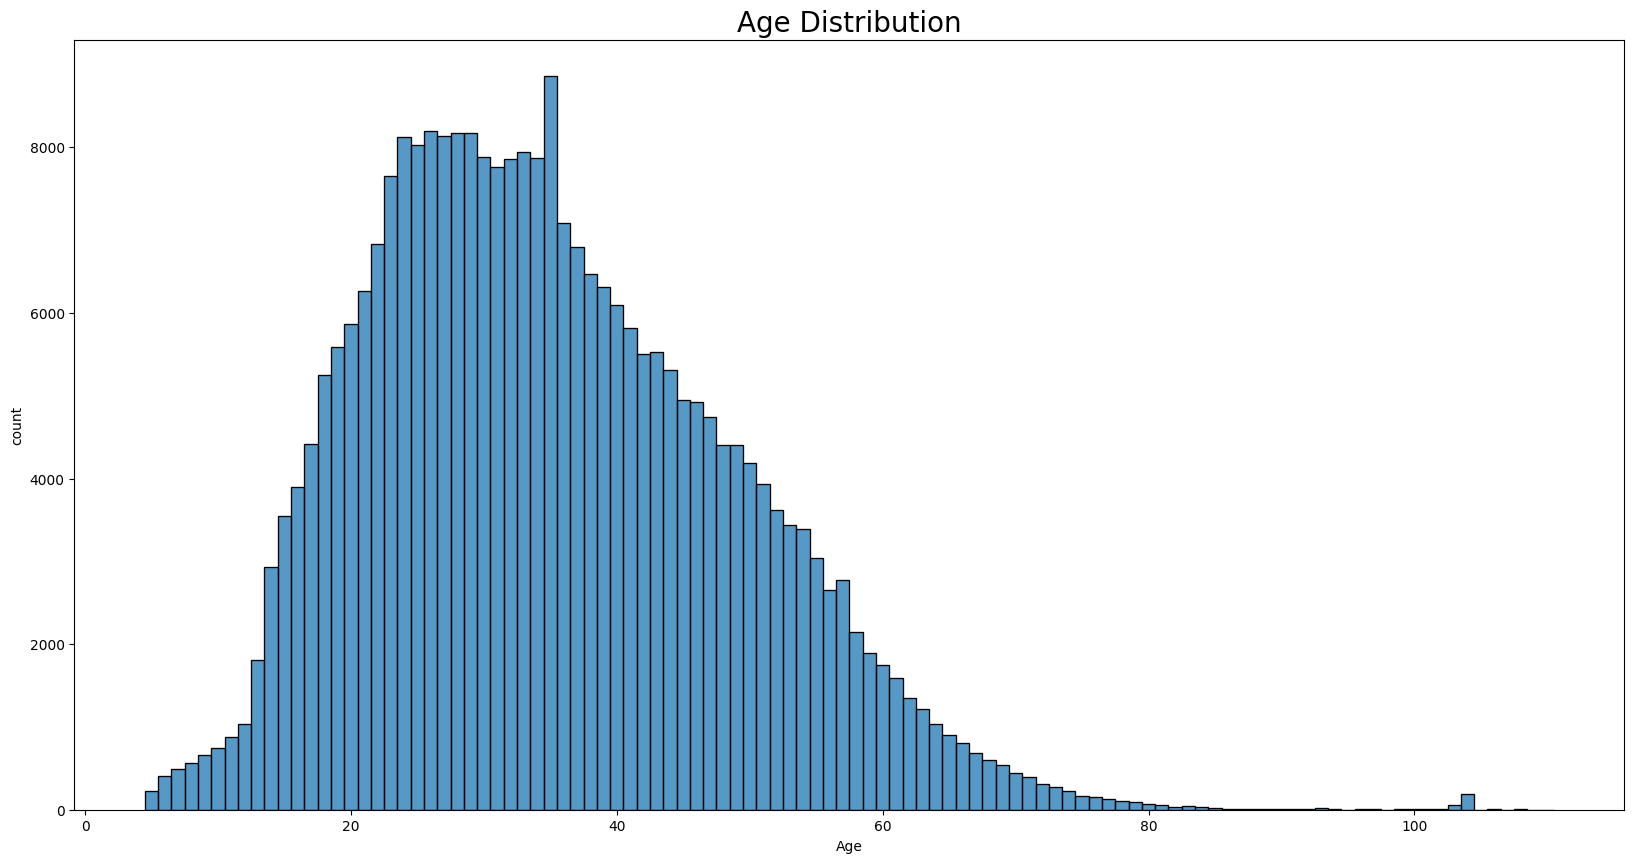

In [73]:
plt.figure(figsize=(20,10))
sns.histplot(users['age'], discrete = True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

*After* ages, now we'll work on `location` column.

In [74]:
users.head()

,userId,location,age
0,1,"nyc, new york, usa",49
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",37
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",45


The information of this column is so messy and wasted. What should we do?

1. Split this column into three new columns: `city`, `state` and `country`.

In [75]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)
user_location_expanded=users.location.str.split(', ', n=2, expand=True)
user_location_expanded.columns=['city', 'state', 'country']
### END CODE HERE ###



```
# This is formatted as code
```

2. Add these three columns into `users` dataframe and remove `location` column.

In [76]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)
users = users.join(user_location_expanded)
users.drop(columns=['location'], inplace=True)
### END CODE HERE ###

3. Some rows have `state` column with `,` value. Change their value into `other`.
4. Some rows have `state` column with `""`, `n.a`, `*` and `\\n/a\\` values. Change their values into `n/a`.
5. Fill other possible NaN values of `state` column with `other` .

In [77]:
# GRADED CELL

### START CODE HERE ### (≈ 3-6 lines of code)
users.loc[users.state==',', ['state', 'country']] = 'other'
users.loc[(users.state=='\\n/a\\"') | (users.state=='') | (users.state=='*') | (users.state=='n.a'), ['state']] = 'n/a'
users.state.fillna('other', inplace=True)

### END CODE HERE ###

6. Some rows have `country` column with `,` value. Change their value into `other`.
7. Fill other possible NaN values of `stateCOUNTRY` column with `n/a`.

In [78]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)
users.loc[users.country==',', ['country']] = 'other'
users.fillna('n/a', inplace=True)

### END CODE HERE ###

*Finally*, change the data type of two `age` and `userId` columns to `int`.

In [79]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)
users['age'] = users['age'].astype(int)
users['userId'] = users['userId'].astype(int)

### END CODE HERE ###

Now we want to have an interactive visualization. For that, we need to reformat contry names w.r.t the following functions:

In [81]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col, cn_name_format="lower")
    except:
        iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try:
        name =  country_alpha2_to_country_name(country_alpha3_to_country_alpha2(col))
    except:
        name = 'Unknown'
    return name

We copy the dataframe to avoid unexpected overwritten results on the main dataframe. Then:

1. Apply `get_alpha3` function to `country` column of the dataframe.
2. Apply `get_name` function to `country` column of the dataframe.

In [82]:
users_copy = users.copy()

In [83]:
# GRADED CELL

### START CODE HERE ### (≈ 2 lines of code)
users_copy['alpha_3'] = users_copy['country'].apply(get_alpha3)
users_copy['alpha_3'].loc[users_copy.country == 'usa'] = 'USA'
users_copy['country'] = users_copy['alpha_3'].apply(get_name)
### END CODE HERE ###

In [84]:
users_copy.head()

,userId,age,city,state,country,alpha_3
0,1,49,nyc,new york,United States,USA
1,2,18,stockton,california,United States,USA
2,3,37,moscow,yukon territory,Russian Federation,RUS
3,4,17,porto,v.n.gaia,Portugal,PRT
4,5,45,farnborough,hants,United Kingdom,GBR


Now:

1. Group the `users_copy` dataframe by `country` and `alpha_3` columns, aggregate `alpha_3` column for `count` aggregate function(consider `Users` as its name).
2. Reset indices of previous step result.

In [85]:
# GRADED CELL

### START CODE HERE ### (≈ 1-2 lines of code)
users_map = users_copy.groupby(['country', 'alpha_3'])['alpha_3'].agg(Users='count').reset_index()

users_map['Users(log)'] = np.log10(users_map["Users"])

In [86]:
users_map.head()

,country,alpha_3,Users,Users(log)
0,Afghanistan,AFG,30,1.477121
1,Albania,ALB,31,1.491362
2,Algeria,DZA,28,1.447158
3,American Samoa,ASM,2,0.301030
4,Andorra,AND,42,1.623249


In [87]:
fig = px.choropleth(users_map, locations="alpha_3",
                    color='Users(log)',
                    hover_name="country",
                    hover_data=["Users"],
                    color_continuous_scale='Cividis')
fig.update_layout(title_text="Unique Users")
fig.update_layout(coloraxis_colorbar=dict(title='Users', tickprefix='1.e'))
fig.show()

Finally, save the `users` dataframe with `{FName_LName}_users_clean.csv` pattern(Don't add index column to output file).







In [89]:
# GRADED CELL

### START CODE HERE ### (≈ 1 line of code)
output_file = "Kamyar_Mohajerani_users_clean.csv"
users.to_csv(output_file, index = False)
### END CODE HERE ###